<a href="https://colab.research.google.com/github/Nataliahfk/TELECOM-X---PARTE-2/blob/main/TelecomX_SegundaParte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TELECOM X - PARTE 2: Previsi√≥n de cancelaci√≥n en las suscripciones**

##**Descripci√≥n del proyecto:**

Desarrollo de modelos predictivos capaces de preveer que clientes tienen mayor probabilidad de cancelar sus suscripciones.

##**Objetivos:**

- Preparar los datos para el modelado (tratamiento, codificaci√≥n, normalizaci√≥n).
- Realizar an√°lisis de correlaci√≥n y selecci√≥n de variables.
- Entrenar dos o m√°s modelos de clasificaci√≥n.
- Evaluar el rendimiento de los modelos con m√©tricas.
- Interpretar los resultados, incluyendo la importancia de las variables.
- Crear una conclusi√≥n estrat√©gica se√±alando los principales factores que influyen en la cancelaci√≥n.

#üìä **Preparar los datos para el modelado**

##1.1. Importando y conociendo los datos

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [61]:
#Importando datos
datos = pd.read_csv('/content/datos_tratados.csv')
datos

id_cliente  abandono  genero  es_ciudadano_senior  tiene_pareja  \
0     0002-ORFBO         0  Female                    0             1   
1     0003-MKNFE         0    Male                    0             0   
2     0004-TLHLJ         1    Male                    0             0   
3     0011-IGKFF         1    Male                    1             1   
4     0013-EXCHZ         1  Female                    1             1   
...          ...       ...     ...                  ...           ...   
7251  9987-LUTYD         0  Female                    0             0   
7252  9992-RRAMN         1    Male                    0             1   
7253  9992-UJOEL         0    Male                    0             0   
7254  9993-LHIEB         0    Male                    0             1   
7255  9995-HOTOH         0    Male                    0             1   

      tiene_dependientes  meses_en_empresa  servicio_telefonico  \
0                      1                 9                    1   
1                      0                 9                    1   
2                      0                 4                    1   
3                      0                13                    1   
4                      0                 3                    1   
...                  ...               ...                  ...   
7251                   0                13                    1   
7252                   0                22                    1   
7253                   0                 2                    1   
7254                   1                67                    1   
7255                   1                63                    0   

      lineas_multiples tipo_internet  ... proteccion_dispositivo  \
0                   No           DSL  ...                     No   
1                  Yes           DSL  ...                     No   
2                   No   Fiber optic  ...                    Yes   
3                   No   Fiber optic  ...                    Yes   
4                   No   Fiber optic  ...                     No   
...                ...           ...  ...                    ...   
7251                No           DSL  ...                     No   
7252               Yes   Fiber optic  ...                     No   
7253                No           DSL  ...                     No   
7254                No           DSL  ...                    Yes   
7255  No phone service           DSL  ...                    Yes   

     soporte_tecnico tv_streaming peliculas_streaming   tipo_contrato  \
0                Yes          Yes                  No        one year   
1                 No           No                 Yes  month to month   
2                 No           No                  No  month to month   
3                 No          Yes                 Yes  month to month   
4                Yes          Yes                  No  month to month   
...              ...          ...                 ...             ...   
7251             Yes           No                  No        one year   
7252              No           No                 Yes  month to month   
7253              No           No                  No  month to month   
7254             Yes           No                 Yes        two year   
7255              No          Yes                 Yes        two year   

     factura_electronica       metodo_pago  cargos_mensuales cargos_totales  \
0                      1      mailed check             65.60         593.30   
1                      0      mailed check             59.90         542.40   
2                      1  electronic check             73.90         280.85   
3                      1  electronic check             98.00        1237.85   
4                      1      mailed check             83.90         267.40   
...                  ...               ...               ...            ...   
7251                   0      mailed check             55.15         742.90  

In [62]:
datos.columns

Index(['id_cliente', 'abandono', 'genero', 'es_ciudadano_senior',
       'tiene_pareja', 'tiene_dependientes', 'meses_en_empresa',
       'servicio_telefonico', 'lineas_multiples', 'tipo_internet',
       'seguridad_online', 'respaldo_online', 'proteccion_dispositivo',
       'soporte_tecnico', 'tv_streaming', 'peliculas_streaming',
       'tipo_contrato', 'factura_electronica', 'metodo_pago',
       'cargos_mensuales', 'cargos_totales', 'cuentas_diarias'],
      dtype='object')

In [63]:
# Eliminaci√≥n de Columnas Irrelevantes
datos.drop('id_cliente', axis=1, inplace=True)
datos.head()

abandono  genero  es_ciudadano_senior  tiene_pareja  tiene_dependientes  \
0         0  Female                    0             1                   1   
1         0    Male                    0             0                   0   
2         1    Male                    0             0                   0   
3         1    Male                    1             1                   0   
4         1  Female                    1             1                   0   

   meses_en_empresa  servicio_telefonico lineas_multiples tipo_internet  \
0                 9                    1               No           DSL   
1                 9                    1              Yes           DSL   
2                 4                    1               No   Fiber optic   
3                13                    1               No   Fiber optic   
4                 3                    1               No   Fiber optic   

  seguridad_online  ... proteccion_dispositivo soporte_tecnico tv_streaming  \
0               No  ...                     No             Yes          Yes   
1               No  ...                     No              No           No   
2               No  ...                    Yes              No           No   
3               No  ...                    Yes              No          Yes   
4               No  ...                     No             Yes          Yes   

  peliculas_streaming   tipo_contrato factura_electronica       metodo_pago  \
0                  No        one year                   1      mailed check   
1                 Yes  month to month                   0      mailed check   
2                  No  month to month                   1  electronic check   
3                 Yes  month to month                   1  electronic check   
4                  No  month to month                   1      mailed check   

  cargos_mensuales  cargos_totales  cuentas_diarias  
0             65.6          593.30         2.186667  
1             59.9          542.40         1.996667  
2             73.9          280.85         2.463333  
3             98.0         1237.85         3.266667  
4             83.9          267.40         2.796667  

[5 rows x 21 columns]

In [64]:
datos.shape[0]

7256

In [65]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   abandono                7256 non-null   int64  
 1   genero                  7256 non-null   object 
 2   es_ciudadano_senior     7256 non-null   int64  
 3   tiene_pareja            7256 non-null   int64  
 4   tiene_dependientes      7256 non-null   int64  
 5   meses_en_empresa        7256 non-null   int64  
 6   servicio_telefonico     7256 non-null   int64  
 7   lineas_multiples        7256 non-null   object 
 8   tipo_internet           7256 non-null   object 
 9   seguridad_online        7256 non-null   object 
 10  respaldo_online         7256 non-null   object 
 11  proteccion_dispositivo  7256 non-null   object 
 12  soporte_tecnico         7256 non-null   object 
 13  tv_streaming            7256 non-null   object 
 14  peliculas_streaming     7256 non-null   

In [66]:
print("\nEstad√≠sticas Variables n√∫mericas:")
display(datos.describe())
print("\nEstad√≠sticas variables categ√≥ricas:")
display(datos.describe(include='object'))


Estad√≠sticas Variables n√∫mericas:


abandono  es_ciudadano_senior  tiene_pareja  tiene_dependientes  \
count  7256.000000            7256.0000   7256.000000         7256.000000   
mean      0.257580               0.1629      0.483600            0.299063   
std       0.437332               0.3693      0.499765            0.457879   
min       0.000000               0.0000      0.000000            0.000000   
25%       0.000000               0.0000      0.000000            0.000000   
50%       0.000000               0.0000      0.000000            0.000000   
75%       1.000000               0.0000      1.000000            1.000000   
max       1.000000               1.0000      1.000000            1.000000   

       meses_en_empresa  servicio_telefonico  factura_electronica  \
count       7256.000000          7256.000000          7256.000000   
mean          32.395535             0.902839             0.593716   
std           24.558067             0.296197             0.491173   
min            1.000000             0.000000             0.000000   
25%            9.000000             1.000000             0.000000   
50%           29.000000             1.000000             1.000000   
75%           55.000000             1.000000             1.000000   
max           72.000000             1.000000             1.000000   

       cargos_mensuales  cargos_totales  cuentas_diarias  
count       7256.000000     7256.000000      7256.000000  
mean          64.755423     2280.634213         2.158514  
std           30.125739     2268.632997         1.004191  
min           18.250000       18.800000         0.608333  
25%           35.450000      400.225000         1.181667  
50%           70.300000     1391.000000         2.343333  
75%           89.900000     3785.300000         2.996667  
max          118.750000     8684.800000         3.958333


Estad√≠sticas variables categ√≥ricas:


genero lineas_multiples tipo_internet seguridad_online respaldo_online  \
count    7256             7256          7256             7256            7256   
unique      2                3             3                3               3   
top      Male               No   Fiber optic               No              No   
freq     3669             3490          3198             3607            3181   

       proteccion_dispositivo soporte_tecnico tv_streaming  \
count                    7256            7256         7256   
unique                      3               3            3   
top                        No              No           No   
freq                     3194            3581         2895   

       peliculas_streaming   tipo_contrato       metodo_pago  
count                 7256            7256              7256  
unique                   3               3                 4  
top                     No  month to month  electronic check  
freq                  2866            4005              2445

##Distribuci√≥n de la variable de respuesta (abandono)

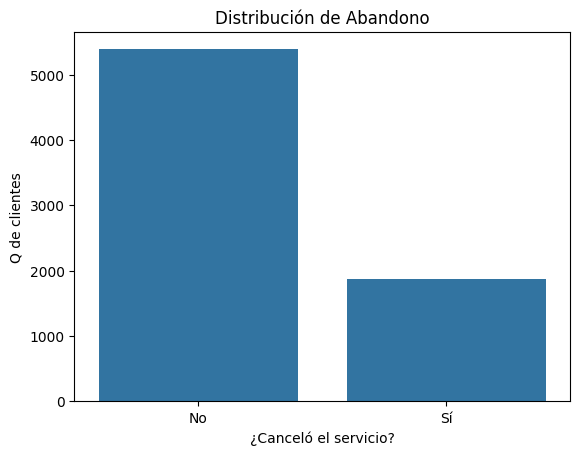

In [67]:
sns.countplot(data=datos, x='abandono')
plt.title('Distribuci√≥n de Abandono')
plt.xlabel('¬øCancel√≥ el servicio?')
plt.ylabel('Q de clientes')
plt.xticks([0, 1], ['No', 'S√≠'])
plt.show()

##1.2. Visualizaci√≥n de las variables categ√≥ricas:

- es_ciudadano_senior
- genero
- tiene_pareja
- tiene_dependientes
- servicio_telefonico

In [68]:
datos1 = datos.copy()
datos1

abandono  genero  es_ciudadano_senior  tiene_pareja  tiene_dependientes  \
0            0  Female                    0             1                   1   
1            0    Male                    0             0                   0   
2            1    Male                    0             0                   0   
3            1    Male                    1             1                   0   
4            1  Female                    1             1                   0   
...        ...     ...                  ...           ...                 ...   
7251         0  Female                    0             0                   0   
7252         1    Male                    0             1                   0   
7253         0    Male                    0             0                   0   
7254         0    Male                    0             1                   1   
7255         0    Male                    0             1                   1   

      meses_en_empresa  servicio_telefonico  lineas_multiples tipo_internet  \
0                    9                    1                No           DSL   
1                    9                    1               Yes           DSL   
2                    4                    1                No   Fiber optic   
3                   13                    1                No   Fiber optic   
4                    3                    1                No   Fiber optic   
...                ...                  ...               ...           ...   
7251                13                    1                No           DSL   
7252                22                    1               Yes   Fiber optic   
7253                 2                    1                No           DSL   
7254                67                    1                No           DSL   
7255                63                    0  No phone service           DSL   

     seguridad_online  ... proteccion_dispositivo soporte_tecnico  \
0                  No  ...                     No             Yes   
1                  No  ...                     No              No   
2                  No  ...                    Yes              No   
3                  No  ...                    Yes              No   
4                  No  ...                     No             Yes   
...               ...  ...                    ...             ...   
7251              Yes  ...                     No             Yes   
7252               No  ...                     No              No   
7253               No  ...                     No              No   
7254              Yes  ...                    Yes             Yes   
7255              Yes  ...                    Yes              No   

     tv_streaming peliculas_streaming   tipo_contrato factura_electronica  \
0             Yes                  No        one year                   1   
1              No                 Yes  month to month                   0   
2              No                  No  month to month                   1   
3             Yes                 Yes  month to month                   1   
4             Yes                  No  month to month                   1   
...           ...                 ...             ...                 ...   
7251           No                  No        one year                   0   
7252           No                 Yes  month to month                   1   
7253           No                  No  month to month                   1   
7254           No                 Yes        two year                   0   
7255          Yes                 Yes        two year                   0   

           metodo_pago cargos_mensuales  cargos_totales  cuentas_diarias  
0         mailed check            65.60          593.30         2.186667  
1         mailed check            59.90          542.40         1.996667  
2     electronic check            73.90          280.85         2.463333  
3     electronic check        

In [69]:
# Reemplazar valores en la columna usada para la leyenda
datos1['abandono'] = datos1['abandono'].replace({0: 'No', 1: 'S√≠'})
# Reemplazar tambi√©n en X
datos1['es_ciudadano_senior'] = datos1['es_ciudadano_senior'].replace({0: 'No', 1: 'S√≠'})

fig = px.histogram(
    datos1,
    x='es_ciudadano_senior',
    text_auto=True,
    color='abandono',
    barmode='group'
)

fig.show()


In [70]:
# Reemplazar valores en la columna usada para la leyenda
datos1['abandono'] = datos1['abandono'].replace({0: 'No', 1: 'S√≠'})
# Reemplazar tambi√©n en X
datos1['genero'] = datos1['genero'].replace({'Female': 'Femenino', 'Male': 'Masculino'})
px.histogram(datos1,x='genero',text_auto=True,color='abandono',barmode='group')

In [71]:
# Reemplazar valores en la columna usada para la leyenda
datos1['abandono'] = datos1['abandono'].replace({0: 'No', 1: 'S√≠'})
# Reemplazar tambi√©n en X
datos1['tiene_pareja'] = datos1['tiene_pareja'].replace({0: 'No', 1: 'S√≠'})
px.histogram(datos1,x='tiene_pareja',text_auto=True,color='abandono',barmode='group')

In [72]:
# Reemplazar valores en la columna usada para la leyenda
datos1['abandono'] = datos1['abandono'].replace({0: 'No', 1: 'S√≠'})
# Reemplazar tambi√©n en X
datos1['tiene_dependientes'] = datos1['tiene_dependientes'].replace({0: 'No', 1: 'S√≠'})
px.histogram(datos1,x='tiene_dependientes',text_auto=True,color='abandono',barmode='group')

In [73]:
# M√©todo crosstab para conocer la relevancia de la variable 'servicio_telefonico' vs abandono
datos1['abandono'] = datos1['abandono'].replace({0: 'No', 1: 'S√≠'})
datos1['servicio_telefonico'] = datos1['servicio_telefonico'].replace({0:'No', 1:'S√≠'})
pd.crosstab(datos1['servicio_telefonico'], datos1['abandono'], normalize='columns').round(2)*100

abandono               No    S√≠
servicio_telefonico            
No                   10.0   9.0
S√≠                   90.0  91.0

In [74]:
# Reemplazar valores en la columna usada para la leyenda
datos1['abandono'] = datos1['abandono'].replace({0: 'No', 1: 'S√≠'})
px.histogram(datos1,x='servicio_telefonico',text_auto=True,color='abandono',barmode='group')

In [75]:
datos

abandono  genero  es_ciudadano_senior  tiene_pareja  tiene_dependientes  \
0            0  Female                    0             1                   1   
1            0    Male                    0             0                   0   
2            1    Male                    0             0                   0   
3            1    Male                    1             1                   0   
4            1  Female                    1             1                   0   
...        ...     ...                  ...           ...                 ...   
7251         0  Female                    0             0                   0   
7252         1    Male                    0             1                   0   
7253         0    Male                    0             0                   0   
7254         0    Male                    0             1                   1   
7255         0    Male                    0             1                   1   

      meses_en_empresa  servicio_telefonico  lineas_multiples tipo_internet  \
0                    9                    1                No           DSL   
1                    9                    1               Yes           DSL   
2                    4                    1                No   Fiber optic   
3                   13                    1                No   Fiber optic   
4                    3                    1                No   Fiber optic   
...                ...                  ...               ...           ...   
7251                13                    1                No           DSL   
7252                22                    1               Yes   Fiber optic   
7253                 2                    1                No           DSL   
7254                67                    1                No           DSL   
7255                63                    0  No phone service           DSL   

     seguridad_online  ... proteccion_dispositivo soporte_tecnico  \
0                  No  ...                     No             Yes   
1                  No  ...                     No              No   
2                  No  ...                    Yes              No   
3                  No  ...                    Yes              No   
4                  No  ...                     No             Yes   
...               ...  ...                    ...             ...   
7251              Yes  ...                     No             Yes   
7252               No  ...                     No              No   
7253               No  ...                     No              No   
7254              Yes  ...                    Yes             Yes   
7255              Yes  ...                    Yes              No   

     tv_streaming peliculas_streaming   tipo_contrato factura_electronica  \
0             Yes                  No        one year                   1   
1              No                 Yes  month to month                   0   
2              No                  No  month to month                   1   
3             Yes                 Yes  month to month                   1   
4             Yes                  No  month to month                   1   
...           ...                 ...             ...                 ...   
7251           No                  No        one year                   0   
7252           No                 Yes  month to month                   1   
7253           No                  No  month to month                   1   
7254           No                 Yes        two year                   0   
7255          Yes                 Yes        two year                   0   

           metodo_pago cargos_mensuales  cargos_totales  cuentas_diarias  
0         mailed check            65.60          593.30         2.186667  
1         mailed check            59.90          542.40         1.996667  
2     electronic check            73.90          280.85         2.463333  
3     electronic check        